In [1]:
from PIL import Image, ImageDraw

In [65]:
class GeneSigil:
    def __init__(self, color, name, *, start_x=0, start_y=0):
        self.color = color
        self.name = name
        self.start_x = start_x
        self.start_y = start_y

    def draw(self, canvas):
        imdraw = canvas
        line_coords = [ (x + self.start_x, y + self.start_y) for (x, y) in
                          ((10, 20), (40, 20), (40, 5), (50, 5)) ]
        imdraw.line(line_coords, fill=self.color, width=2, joint='curve')

        poly_coords = [ (x + self.start_x, y + self.start_y) for (x, y) in
                           ((50, 5), (46, 3), (46, 8), (50, 5))]
        imdraw.polygon(poly_coords, fill=self.color)

        imdraw.text((25 + self.start_x, 30 + self.start_y), self.name, fill=color, anchor='mm')

    def estimate_size(self):
        return (60, 42)



size: (60, 42)


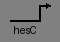

In [66]:
gene = GeneSigil('black', 'hesC')
size = gene.estimate_size()
print(f'size: {size}')

im = Image.new('RGB', size, 'grey')
imdraw = ImageDraw.Draw(im)
gene.draw(imdraw)
im

In [85]:
class TissueSigil:
    def __init__(self, n_rows, n_cols):
        self.n_rows = n_rows
        self.n_cols = n_cols

        g = GeneSigil('black', 'ubiq')
        gene_size = g.estimate_size()
        self.padding = (int(0.25 * gene_size[0]), int(0.25 * gene_size[0]))
        self.box_size = (1.5 * gene_size[0], 1.5*gene_size[1])

    def estimate_size(self):
        width = int(self.n_rows * self.box_size[0])
        height = int(self.n_rows * self.box_size[1])
        return (width, height)

    def draw(self, canvas):
        box_size = self.box_size
        padding = self.padding
        for row in range(self.n_rows):
            for col in range(self.n_cols):
                name = f"{row}.{col}"
                color = 'black'

                g = GeneSigil(color, name, start_x=col*box_size[0]+padding[0], start_y = row*box_size[1] + padding[1])
                g.draw(canvas)

size: (450, 315)


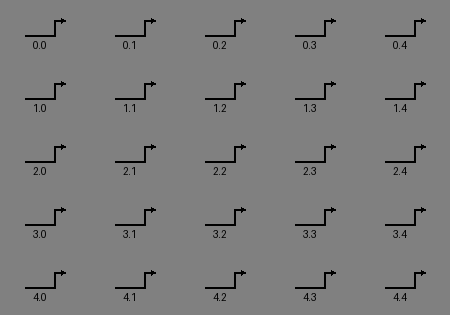

In [86]:
tissue = TissueSigil(5, 5)
size = tissue.estimate_size()
print(f'size: {size}')

im = Image.new('RGB', size, 'grey')
imdraw = ImageDraw.Draw(im)
tissue.draw(imdraw)
im